In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**I am using mpg dataset from seaborn datasets.**

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


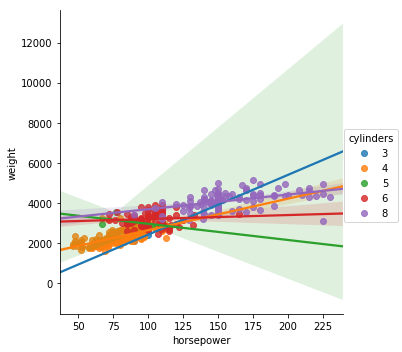

In [4]:
sns.lmplot(y='weight', x='horsepower', data=df, hue='cylinders')

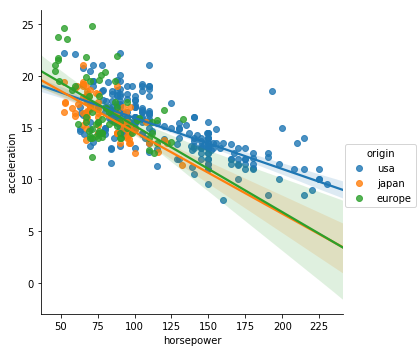

In [5]:
sns.lmplot(y='acceleration', x='horsepower', data=df, hue='origin')

/home/vivek/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


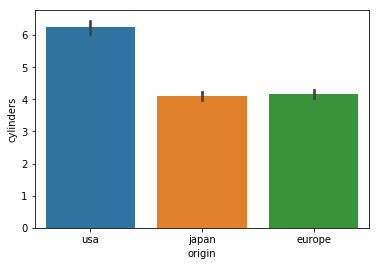

In [6]:
sns.barplot(x='origin', y='cylinders', data=df)

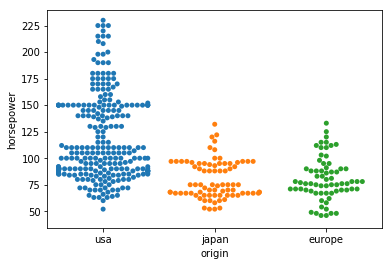

In [7]:
sns.swarmplot(x='origin', y='horsepower', data=df)

/home/vivek/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


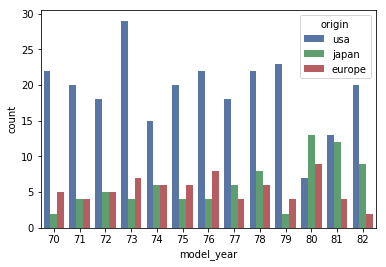

In [ ]:
sns.countplot(x='model_year', data=df, hue='origin', palette='deep')

In [ ]:
sns.lmplot(y='horsepower', x='mpg', data=df, hue='cylinders')

**It's clear that more number of cylinders increases the horsepower and fuel efficiency of car.**

In [ ]:
df.corr()

Here we will assume that **mpg** is our label and all the other variables are features of dataset. So, we will try to generate more features which will relate to our label. First, we will convert categorical feature **origin** into 3 different features which will have boolean values for every element.

In [ ]:
df['USA'] = df['origin'].where(df['origin']=='usa', 0).replace('usa', 1)
df['JAPAN'] = df['origin'].where(df['origin']=='japan', 0).replace('japan', 1)
df['EUROPE'] = df['origin'].where(df['origin']=='europe', 0).replace('europe', 1)

These features will help our model to run more efficiently. Next, we will generate few features using correlation matrix as above.

In [ ]:
df['cylinder_displacement'] = df['cylinders'] * df['displacement']

In [ ]:
df['weight_displacement'] = df['weight'] * df['displacement']

In [ ]:
df['horsepower_displacement'] = df['horsepower'] * df['displacement']

In [ ]:
df['weight_by_cylinder'] = df['weight'] / df['cylinders']

Now, we'll generate some other features from our domain knowledge. So, mpg or efficiency of car is highly related to it's performance and weight. We would generates some features so that horsepower, acceleration and weight are joined to create different features.

In [ ]:
df['weight_by_acceleration'] = df['weight'] / df['acceleration']

In [ ]:
df['horsepower_acceleration'] = df['horsepower'] * df['acceleration']

In [ ]:
df['weight_by_acceleration_horsepower'] = (df['weight'] / df['acceleration']) * df['horsepower']

We have generated 10 different features which will be helpful for our model. For, getting more precise only 5 of these features should be used for modeling. Three features will be for categorical feature origin. USA has generated many cars with high horsepower and acceleration so it is necessary to divided these origins for our model.


In [ ]:
sns.swarmplot(x='origin', y='mpg', data=df)
plt.title('mpg to origin')

In [ ]:
sns.swarmplot(x='cylinders', y='mpg', data=df)

Cylinders and weight play major role in deciding efficiency of a car, so we can also use **weight_by_cylinder**. Last feature we would use is **weight_by_acceleration_horsepower** as all these three variables would be essintial in finding mpg.